# **Exploratory Data Analysis**

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [68]:
df0 = pd.read_csv('DATASETS/iris.csv')
df = df0.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


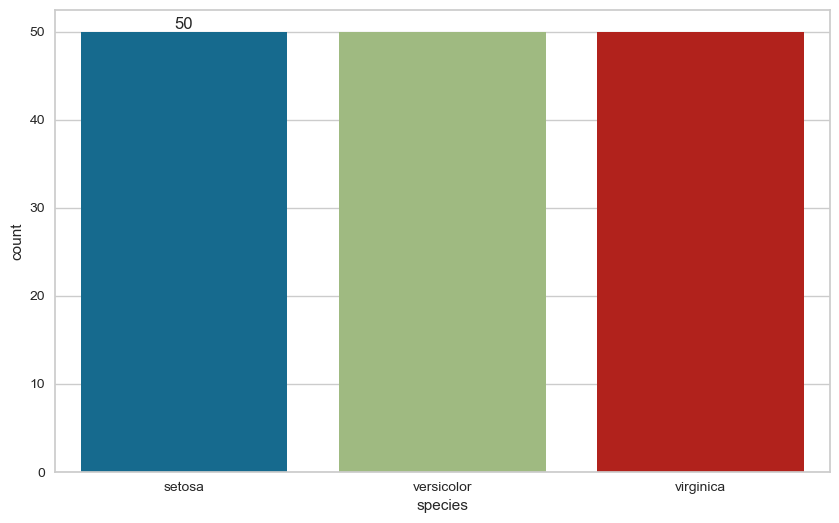

In [72]:
ax = sns.countplot(data = df, x ='species', hue='species')
ax.bar_label(ax.containers[0]);

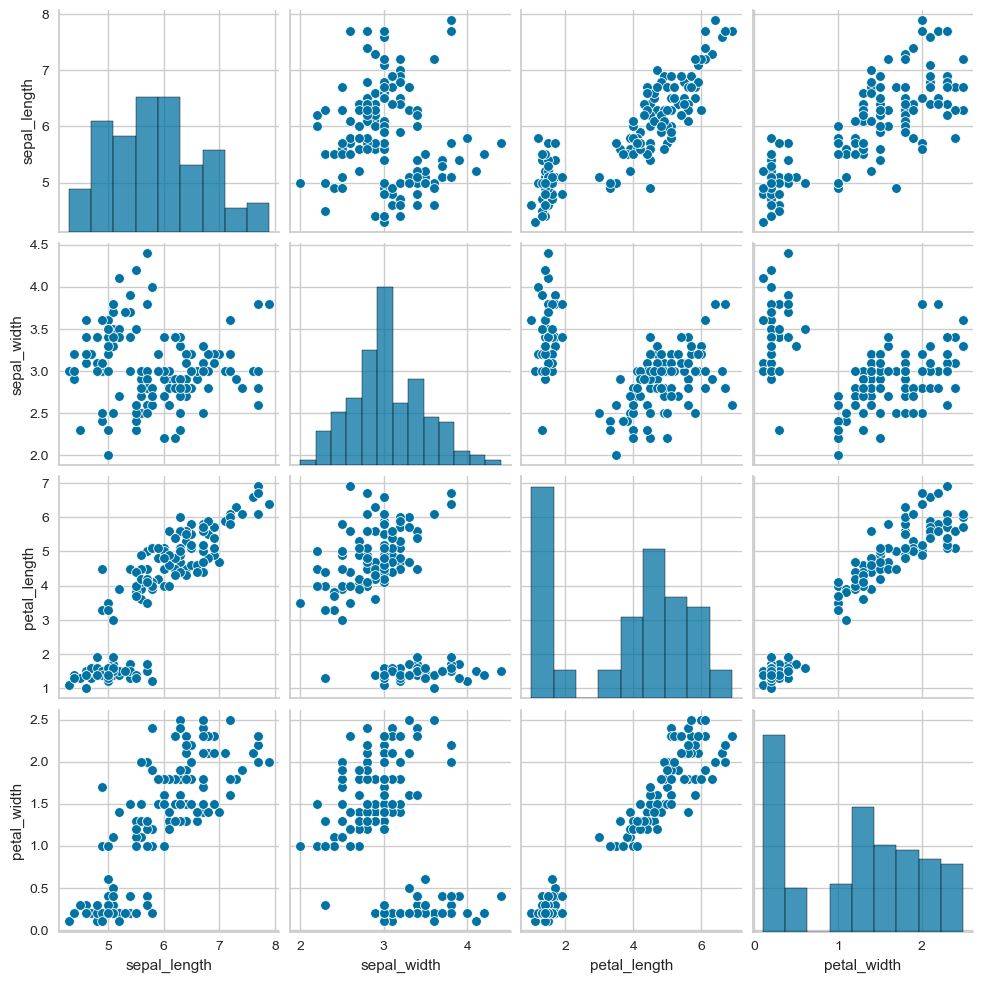

In [73]:
sns.pairplot(df);

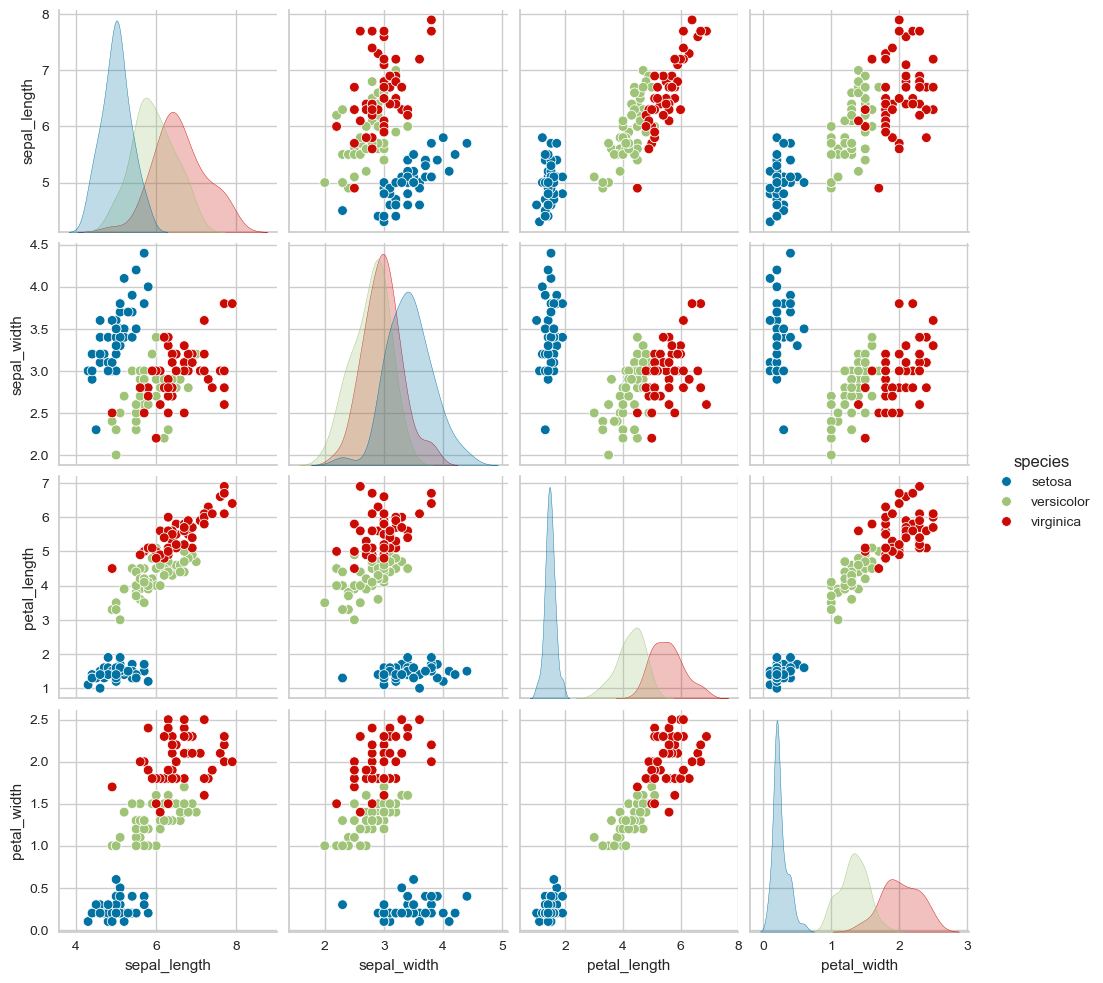

In [74]:
sns.pairplot(df, hue="species");

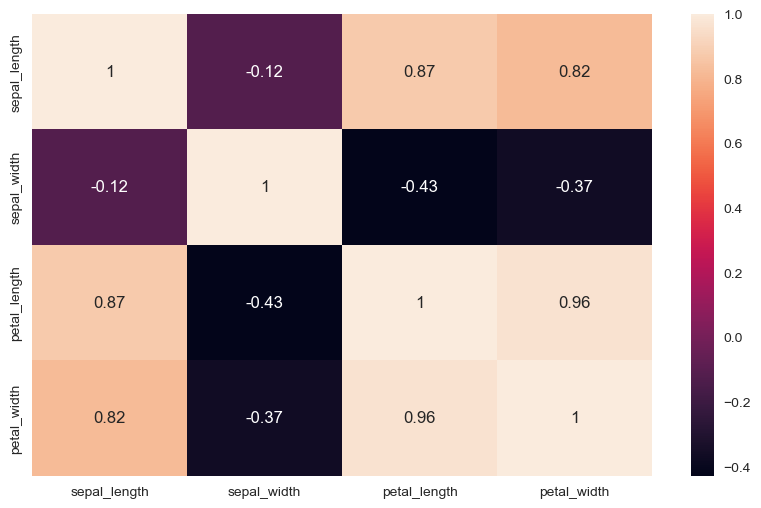

In [75]:
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True);

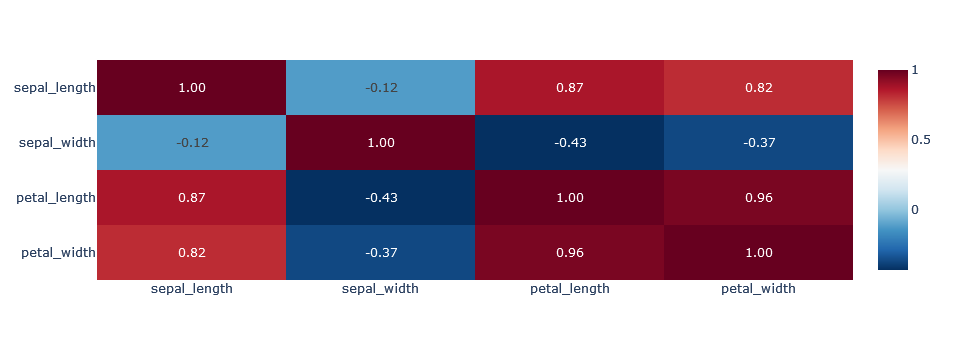

In [76]:
import plotly.express as px

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

fig = px.imshow(corr_matrix, text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

In [77]:
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

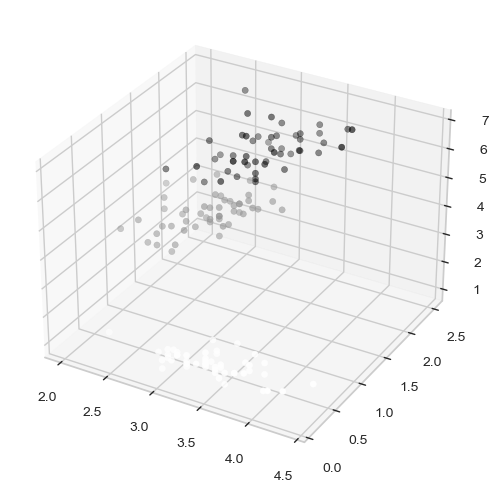

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
ax.scatter(df["sepal_width"], df["petal_width"], df["petal_length"], c=colors);

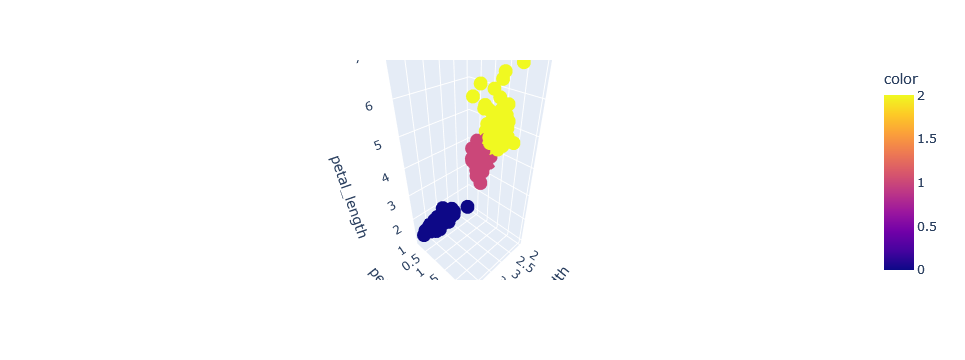

In [79]:
colors = df["species"].map({"setosa": 0, "versicolor": 1, "virginica": 2})
fig = px.scatter_3d(
    df,
    x="sepal_width",
    y="petal_width",
    z="petal_length",
    color=colors,
)

fig.show()

# **2. Train | Test Split**

In [80]:
X = df.drop("species", axis=1)
y = df["species"]

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

# **3. Modelling and Model Performance** 

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## 3.1. With Default Parameters

In [84]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [85]:
y_pred = pipe_model.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

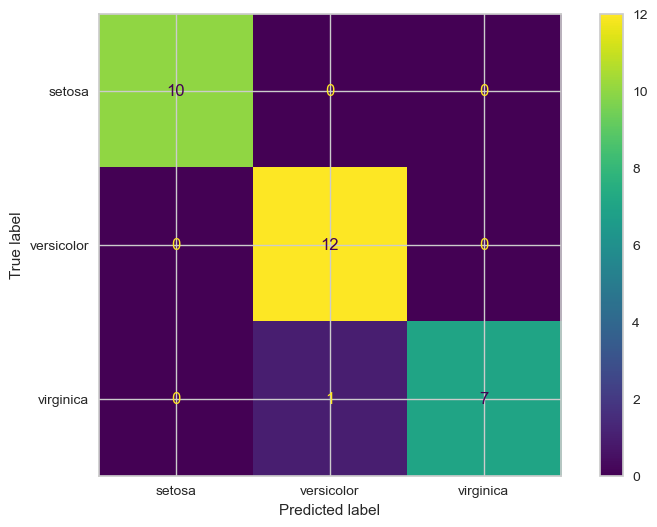

In [86]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

> ***Aşağıdaki değerlendirme versicolor label'ına göre yapılmıştır:***
>
> 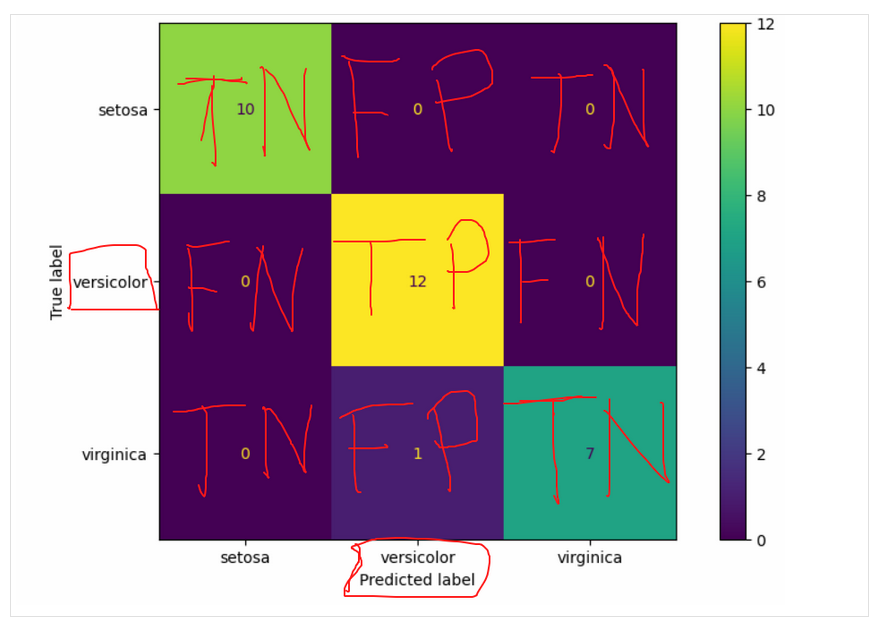

In [87]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [88]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



## 3.2. Cross Validate

In [89]:
from sklearn.model_selection import cross_validate

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, 
                        scoring = ['accuracy', 'precision_weighted','recall_weighted', 'f1_weighted'], 
                        cv = 10, return_train_score=True, n_jobs=-1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.950000
train_accuracy              0.963889
test_precision_weighted     0.960000
train_precision_weighted    0.964076
test_recall_weighted        0.950000
train_recall_weighted       0.963889
test_f1_weighted            0.949206
train_f1_weighted           0.963872
dtype: float64

## 3.3. Cross Validate for Versicolor

In [90]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

f1_versicolor = make_scorer(f1_score, 
                            average=None, 
                            labels=["versicolor"])

precision_versicolor = make_scorer(precision_score,
                                   average=None,
                                   labels=["versicolor"])

recall_versicolor = make_scorer(recall_score,
                                average=None,
                                labels=["versicolor"])

scoring = {
    "f1_versicolor": f1_versicolor,
    "precision_versicolor": precision_versicolor,
    "recall_versicolor": recall_versicolor
}

In [91]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_f1_versicolor           NaN
train_f1_versicolor          NaN
test_precision_versicolor    NaN
train_precision_versicolor   NaN
test_recall_versicolor       NaN
train_recall_versicolor      NaN
dtype: float64

In [92]:
y_pred = pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba = np.round(y_pred_proba, 2)

In [93]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,pred,pred_proba_setosa,pred_proba_versicolar,pred_proba_virginica
74,6.4,2.9,4.3,1.3,versicolor,versicolor,0.01,0.91,0.08
64,5.6,2.9,3.6,1.3,versicolor,versicolor,0.10,0.87,0.03
42,4.4,3.2,1.3,0.2,setosa,setosa,0.98,0.02,0.00
43,5.0,3.5,1.6,0.6,setosa,setosa,0.97,0.03,0.00
129,7.2,3.0,5.8,1.6,virginica,virginica,0.00,0.35,0.64
68,6.2,2.2,4.5,1.5,versicolor,versicolor,0.00,0.65,0.35
65,6.7,3.1,4.4,1.4,versicolor,versicolor,0.01,0.88,0.11
53,5.5,2.3,4.0,1.3,versicolor,versicolor,0.01,0.89,0.11
147,6.5,3.0,5.2,2.0,virginica,virginica,0.00,0.16,0.84
97,6.2,2.9,4.3,1.3,versicolor,versicolor,0.02,0.90,0.08


## 3.4. With Best Parameters (GridsearchCV)

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

In [96]:
# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]

C = np.logspace(-1, 5, 20)

param_grid = [
    {
        "logistic__penalty": ["l1"],
        "logistic__C": C,
        "logistic__solver": ["liblinear", "saga"]
    },
    {
        "logistic__penalty": ["l2"],
        "logistic__C": C,
        "logistic__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    },
    {
        "logistic__penalty": ["elasticnet"],
        "logistic__C": C,
        "logistic__solver": ["saga"],
        "logistic__l1_ratio": np.linspace(0, 1, 10)  # ElasticNet için l1_ratio ekliyoruz
    },
    {
        "logistic__penalty": ["none"],
        "logistic__solver": ["newton-cg", "lbfgs", "sag", "saga"]
    }
]

In [97]:
grid_model = GridSearchCV(model, param_grid= param_grid, cv=5, return_train_score=True, n_jobs=-1)

In [98]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.2...
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                          'logistic__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'logistic__penalty': ['elasticnet'],
                          'logistic__solver': ['saga']},
                         {'logistic__penalty': ['none'],
                          'logistic__solver': ['newton-cg', 'lbfgs', 'sag',
                                               'saga']}],
             return_train_score=True)

In [99]:
grid_model.best_params_

{'logistic__C': 33.59818286283781,
 'logistic__penalty': 'l1',
 'logistic__solver': 'saga'}

In [100]:
grid_model.best_score_

0.975

In [101]:
y_pred = grid_model.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

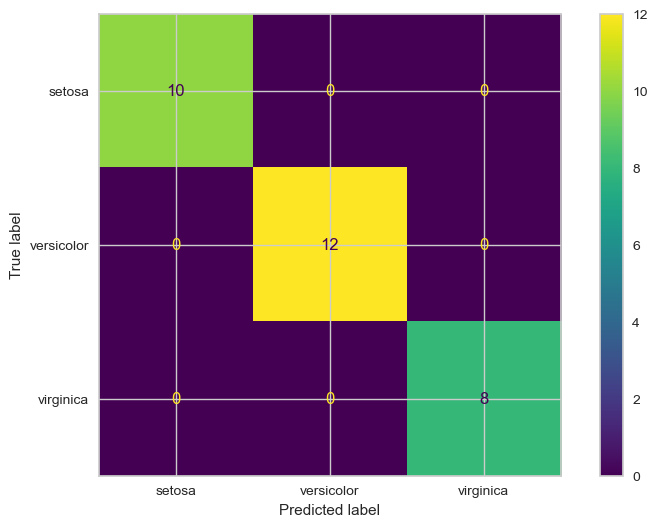

In [102]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [103]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## 3.5. ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [104]:
from sklearn.metrics import RocCurveDisplay

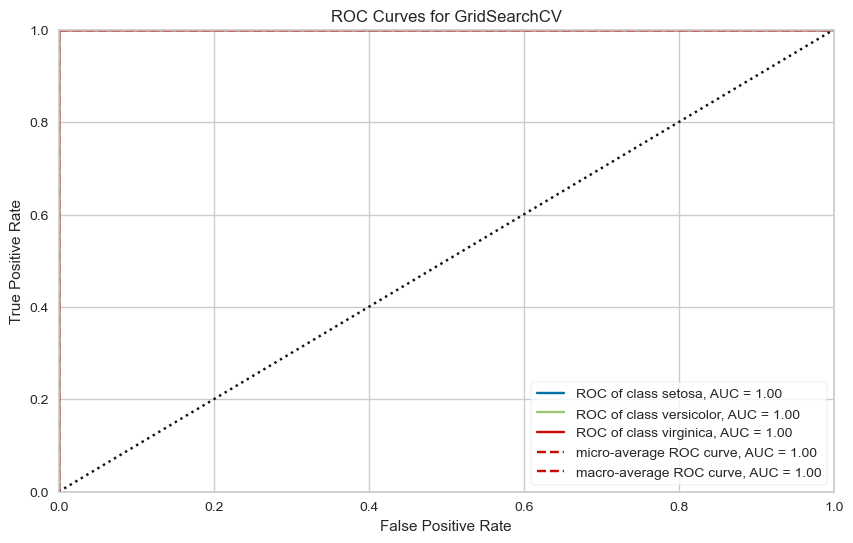

In [105]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();  

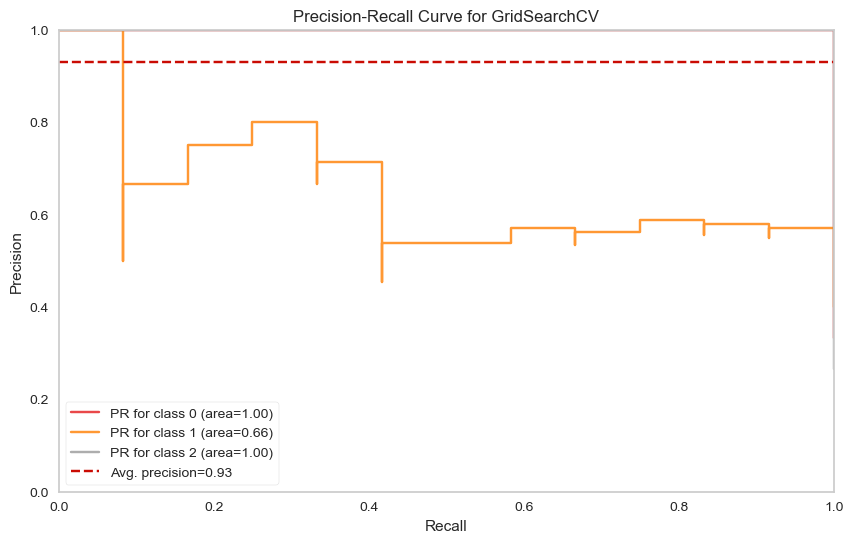

In [106]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,#buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [107]:
# Yukarıdaki grafikte de görüşdüğü gibi Dengeli ve Multiclass datasetlerinde Precision-Recall Curve yanıltıcı oluyor !!!!!

# **4. Final Model and Model Deployment**

In [108]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [109]:
import pickle
pickle.dump(final_model,open("final_pipe_model", "wb"))

In [110]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [111]:
my_dict = {"sepal_length": [4.2, 6.8, 5.5],
           "sepal_width": [3.2, 2.7, 4],
           "petal_length": [1.9, 5.1, 4.5],
           "petal_width": [1.2, 0.5, 2]
          }

In [112]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [113]:
sample = pd.DataFrame(my_dict)
sample

,sepal_length,sepal_width,petal_length,petal_width
0,4.2,3.2,1.9,1.2
1,6.8,2.7,5.1,0.5
2,5.5,4.0,4.5,2.0


In [114]:
predictions = final_model.predict(sample)
predictions_proba = final_model.predict_proba(sample)

In [115]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.2,3.2,1.9,1.2,setosa,0.960387,0.039564,0.000049
1,6.8,2.7,5.1,0.5,versicolor,0.003152,0.989262,0.007586
2,5.5,4.0,4.5,2.0,setosa,0.345555,0.338746,0.315699
